<a href="https://colab.research.google.com/github/haroldfox/ts-stuy-2019/blob/master/02_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd   
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import datetime

In [4]:
!git clone https://<username>:<password>@github.com/haroldfox/ts-stuy-2019

Cloning into 'ts-stuy-2019'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 69 (delta 17), reused 26 (delta 2), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [0]:
songs = pd.read_hdf('ts-stuy-2019/datasets/songs.h5')
song_date = pd.read_hdf('ts-stuy-2019/datasets/song_date.h5')
song_artist = pd.read_hdf('ts-stuy-2019/datasets/song_artist.h5')

In [63]:
artists = song_artist[['Artist', 'ArtistLink']].drop_duplicates()
artists.head()

,Artist,ArtistLink
0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
1,21 Savage,../artist/1URnnhqYAYcrqrcwql10ft.html
0,Lil Uzi Vert,../artist/4O15NlyKLIASxsJ0PrXPfz.html
0,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html
0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html


In [5]:
songs.head()

,Artist,ArtistLink,Song,SongLink
0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,rockstar,../track/7wGoVu4Dady5GV0Sv4UIsx.html
1,Lil Uzi Vert,../artist/4O15NlyKLIASxsJ0PrXPfz.html,XO TOUR Llif3,../track/7GX5flRQZVHRAGd6B4TmDO.html
2,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html,HUMBLE.,../track/7KXjTSCq5nL1LoYtL7XAwS.html
3,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html
4,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,One Dance,../track/1xznGGDReH1oQq0xzbwXa3.html


In [12]:
songs[songs['Track'] == 'Sober']

,Artist,ArtistLink,Track,TrackUrl
1405,G-Eazy,../artist/02kJSzxNuaWGqwubyUba0Z.html,Sober,../track/3qk4wRMDlaeagZGjSYbsOV.html
1763,Demi Lovato,../artist/6S2OmqARrzebs0tKUEyXyp.html,Sober,../track/0STK94RxUulYqWzwFlyAb5.html
1902,Childish Gambino,../artist/73sIBHcqh3Z3NyqHKZ7FOL.html,Sober,../track/6olUplztLFFfU7fMYmFXOP.html
2591,Lorde,../artist/163tK9Wjr9P9DmM0AVK7lm.html,Sober,../track/2mNbgyi0gori4b1rFSPgIb.html
2821,Selena Gomez,../artist/0C8ZW7ezQVs4URX5aX7Kqx.html,Sober,../track/3viZcRlE38APncWJ5VGM4q.html


In [6]:
song_date.head()

,Date,Streams,TrackUrl,Track
0,2017-09-21,17453592.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar
1,2017-09-28,19553820.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar
2,2017-10-05,18558660.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar
3,2017-10-12,17366836.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar
4,2017-10-19,18173497.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar


In [0]:
songs = songs.rename(columns={'Song': 'Track', 'SongLink': 'TrackUrl'})

In [9]:
songs.groupby('Track').count().sort_values('TrackUrl', ascending=False).head(10)

,Artist,ArtistLink,TrackUrl
Track,,,
Sober,5,5,5
White Christmas,5,5,5
Sleigh Ride,4,4,4
Stay,4,4,4
Intro,4,4,4
X,4,4,4
Secrets,4,4,4
Famous,4,4,4
Sorry,4,4,4


In [8]:
song_streams = song_date.groupby(['Track', 'TrackUrl'], as_index=False)[['Streams']].sum()
song_streams.sort_values('Streams', ascending=False).head(20)

,Track,TrackUrl,Streams
3960,rockstar,../track/7wGoVu4Dady5GV0Sv4UIsx.html,526568911.0
3819,XO TOUR Llif3,../track/7GX5flRQZVHRAGd6B4TmDO.html,500942651.0
1375,HUMBLE.,../track/7KXjTSCq5nL1LoYtL7XAwS.html,494041788.0
1314,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html,484983076.0
2457,One Dance,../track/1xznGGDReH1oQq0xzbwXa3.html,456343099.0
738,Congratulations,../track/3a1lNhkSLSkpJE4MSHpDu9.html,451833377.0
691,Closer,../track/7BKLCZ1jbUBVqRi2FVlTVw.html,404877134.0
2808,SAD!,../track/3ee8Jmje8o58CHK66QrVC2.html,383011211.0
3925,goosebumps,../track/6gBFPUFcJLzWGx4lenP6h2.html,359510103.0
1989,Location,../track/152lZdxL1OR0ZMW6KquMif.html,354114515.0


In [9]:
top_by_date = song_date.sort_values(['Date', 'Streams'], ascending=(True, False)).groupby('Date').head(1)
top_by_date

,Date,Streams,TrackUrl,Track
0,2013-04-28,1776611.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
1,2013-05-05,1847611.0,../track/3bidbhpOYeV4knp8AIu8Xn.html,Can't Hold Us
2,2013-05-12,1790001.0,../track/3bidbhpOYeV4knp8AIu8Xn.html,Can't Hold Us
3,2013-05-19,1709270.0,../track/3bidbhpOYeV4knp8AIu8Xn.html,Can't Hold Us
4,2013-05-26,2331989.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
5,2013-06-02,2267539.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
6,2013-06-09,2055810.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
7,2013-06-16,1952438.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
0,2013-06-23,3333228.0,../track/6g1NlCpW7fgqDnWbCCDrHl.html,Wake Me Up
1,2013-06-30,3716728.0,../track/6g1NlCpW7fgqDnWbCCDrHl.html,Wake Me Up


In [0]:
song_streams = pd.merge(song_streams, songs[['TrackUrl', 'Artist', 'ArtistLink']], on='TrackUrl')

In [24]:
song_streams.sort_values('Streams', ascending=False).head(20)

,Track,TrackUrl,Streams,Artist,ArtistLink
3960,rockstar,../track/7wGoVu4Dady5GV0Sv4UIsx.html,526568911.0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
3819,XO TOUR Llif3,../track/7GX5flRQZVHRAGd6B4TmDO.html,500942651.0,Lil Uzi Vert,../artist/4O15NlyKLIASxsJ0PrXPfz.html
1375,HUMBLE.,../track/7KXjTSCq5nL1LoYtL7XAwS.html,494041788.0,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html
1314,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html,484983076.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
2457,One Dance,../track/1xznGGDReH1oQq0xzbwXa3.html,456343099.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
738,Congratulations,../track/3a1lNhkSLSkpJE4MSHpDu9.html,451833377.0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
691,Closer,../track/7BKLCZ1jbUBVqRi2FVlTVw.html,404877134.0,The Chainsmokers,../artist/69GGBxA162lTqCwzJG5jLp.html
2808,SAD!,../track/3ee8Jmje8o58CHK66QrVC2.html,383011211.0,XXXTENTACION,../artist/15UsOTVnJzReFVN1VCnxy4.html
3925,goosebumps,../track/6gBFPUFcJLzWGx4lenP6h2.html,359510103.0,Travis Scott,../artist/0Y5tJX1MQlPlqiwlOH1tJY.html
1989,Location,../track/152lZdxL1OR0ZMW6KquMif.html,354114515.0,Khalid,../artist/6LuN9FCkKOj5PcnpouEgny.html


In [0]:
top_by_date = pd.merge(top_by_date, songs[['TrackUrl', 'Artist']], on='TrackUrl')

In [19]:
top_by_date.tail(60)

,Date,Streams,TrackUrl,Track,Artist
241,2018-01-11,9855305.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,Post Malone
242,2018-01-18,9029173.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,Post Malone
243,2018-01-25,26345370.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
244,2018-02-01,28708450.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
245,2018-02-08,24209854.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
246,2018-02-15,22071986.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
247,2018-02-22,23813466.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
248,2018-03-01,23327237.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
249,2018-03-08,20829362.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
250,2018-03-15,18577161.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake


In [12]:
artist_streams = song_streams.groupby(['Artist', 'ArtistLink'], as_index=False)[['Streams']].sum()
artist_streams.sort_values('Streams', ascending=False).head(20)

,Artist,ArtistLink,Streams
209,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,6.113544e+09
601,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,3.806344e+09
781,XXXTENTACION,../artist/15UsOTVnJzReFVN1VCnxy4.html,2.614651e+09
722,The Weeknd,../artist/1Xyo4u8uXC1ZmMpatF05PJ.html,2.154281e+09
385,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html,1.884075e+09
49,Ariana Grande,../artist/66CXWjxzNUsdJxJ2JdwvnR.html,1.808600e+09
222,Ed Sheeran,../artist/6eUKZXaKkcviH0Ku9w2n3V.html,1.564102e+09
747,Travis Scott,../artist/0Y5tJX1MQlPlqiwlOH1tJY.html,1.544492e+09
708,The Chainsmokers,../artist/69GGBxA162lTqCwzJG5jLp.html,1.508529e+09
502,Migos,../artist/6oMuImdp5ZcFhWP0ESe6mG.html,1.391708e+09


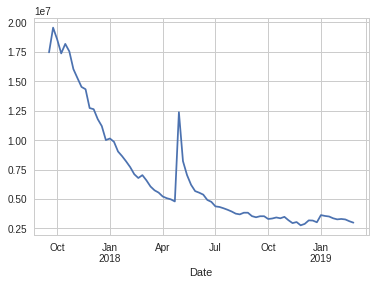

In [29]:
song_date[song_date['Track'] == 'rockstar'].set_index('Date')['Streams'].plot()

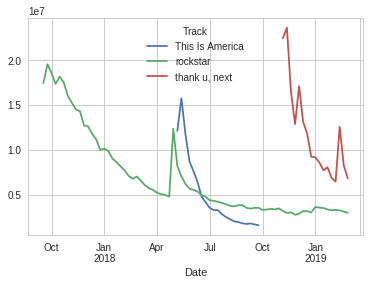

In [32]:
song_date[song_date['Track'].isin(['rockstar', 'thank u, next', 'This Is America'])].pivot('Date', 'Track', 'Streams').plot()

In [0]:
song_date['Month'] = song_date['Date'].dt.to_period('M')

In [38]:
song_date[song_date['Month'].dt.year == 2018].tail(60)

,Date,Streams,TrackUrl,Track,Month
113,2018-04-12,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-04
114,2018-04-19,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-04
115,2018-04-26,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-04
116,2018-05-03,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
117,2018-05-10,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
118,2018-05-17,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
119,2018-05-24,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
120,2018-05-31,355736.0,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
121,2018-06-07,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-06
122,2018-06-14,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-06


In [0]:
song_month = song_date.groupby(['Track', 'TrackUrl', 'Month'], as_index=False)[['Streams']].sum()

In [0]:
top_by_month = song_month.sort_values(['Month', 'Streams'], ascending=(True, False)).groupby('Month', as_index=False).head(1)

In [0]:
top_by_month = pd.merge(top_by_month, songs[['Artist', 'TrackUrl', 'ArtistLink']], on=['TrackUrl'])

In [45]:
top_by_month[top_by_month['Month'].dt.year == 2018]

,Track,TrackUrl,Month,Streams,Artist,ArtistLink
57,rockstar,../track/7wGoVu4Dady5GV0Sv4UIsx.html,2018-01,37653990.0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
58,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html,2018-02,98803756.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
59,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html,2018-03,95601590.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
60,Nice For What,../track/1cTZMwcBJT0Ka3UJPXOeeN.html,2018-04,55911864.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
61,Better Now,../track/7dt6x5M1jzdTEt8oCbisTK.html,2018-05,67188971.0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
62,Lucid Dreams,../track/0s3nnoMeVWz3989MkNQiRf.html,2018-06,52746674.0,Juice WRLD,../artist/4MCBfE4596Uoi2O4DtmEMz.html
63,In My Feelings,../track/2G7V7zsVDxg1yRsu7Ew9RJ.html,2018-07,95448936.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
64,In My Feelings,../track/2G7V7zsVDxg1yRsu7Ew9RJ.html,2018-08,72081413.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
65,Lucky You,../track/60SdxE8apGAxMiRrpbmLY0.html,2018-09,44599191.0,Eminem,../artist/7dGJo4pcD2V6oG8kP0tJRR.html
66,SICKO MODE,../track/2xLMifQCjDGFmkHkpNLD9h.html,2018-10,38410631.0,Travis Scott,../artist/0Y5tJX1MQlPlqiwlOH1tJY.html


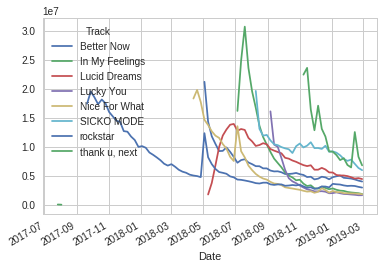

In [46]:
song_date[song_date['Track'].isin(['rockstar', "GOd's Plan", 'Nice For What', 'Better Now', 'Lucid Dreams', 'In My Feelings', 'Lucky You', 'SICKO MODE', 'thank u, next'])].pivot('Date', 'Track', 'Streams').plot()

In [0]:
song_date = pd.merge(song_date, songs[['Artist', 'ArtistLink', 'TrackUrl']], on='TrackUrl')

In [49]:
song_date.head()

,Date,Streams,TrackUrl,Track,Month,Artist,ArtistLink
0,2017-09-21,17453592.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-09,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
1,2017-09-28,19553820.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-09,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
2,2017-10-05,18558660.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-10,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
3,2017-10-12,17366836.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-10,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
4,2017-10-19,18173497.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-10,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html


In [0]:
artist_date = song_date.groupby(['Date', 'Artist', 'ArtistLink'], as_index=False)[['Streams']].sum()

In [0]:
top_artist = artist_date.sort_values(['Date', 'Streams'], ascending=(True, False)).groupby('Date', as_index=False).head(1)

In [52]:
top_artist.tail(60)

,Date,Artist,ArtistLink,Streams
42083,2018-01-11,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,30606271.0
42171,2018-01-18,Camila Cabello,../artist/4nDoRrQiYLoBzwC5BhVJzF.html,31082632.0
42428,2018-01-25,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,41579098.0
42747,2018-02-01,Migos,../artist/6oMuImdp5ZcFhWP0ESe6mG.html,78699870.0
42972,2018-02-08,Migos,../artist/6oMuImdp5ZcFhWP0ESe6mG.html,42292398.0
43165,2018-02-15,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html,34487417.0
43352,2018-02-22,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,32434467.0
43705,2018-03-01,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,50891990.0
43945,2018-03-08,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,41507560.0
44138,2018-03-15,Logic,../artist/4xRYI6VqpkE3UwrDrAZL8L.html,72930914.0


In [0]:
date_total = song_date.groupby('Date', as_index=False)[['Streams']].sum()

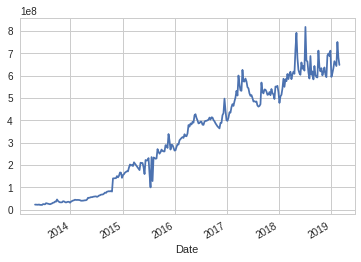

In [22]:
date_total.set_index('Date')['Streams'].plot()

In [23]:
song_date.head()

,Date,Streams,TrackUrl,Track,Month,Artist,ArtistLink
0,2017-09-21,17453592.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-09,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
1,2017-09-28,19553820.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-09,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
2,2017-10-05,18558660.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-10,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
3,2017-10-12,17366836.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-10,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
4,2017-10-19,18173497.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-10,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html


In [0]:
top_songs = song_date.sort_values(['Date', 'Streams'], ascending=(True, False)).groupby('Date', as_index=False).head(1)

In [25]:
top_songs_first = top_songs.sort_values('Date').groupby('TrackUrl', as_index=False).head(1)
top_songs_first.head(10)

,Date,Streams,TrackUrl,Track,Month,Artist,ArtistLink
51112,2013-04-28,1776611.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky,2013-04,Daft Punk,../artist/4tZwfgrHOc3mvqYlEYSvVi.html
33226,2013-05-05,1847611.0,../track/3bidbhpOYeV4knp8AIu8Xn.html,Can't Hold Us,2013-05,Macklemore & Ryan Lewis,../artist/5BcAKTbp20cv7tC5VqPFoC.html
28099,2013-06-23,3333228.0,../track/6g1NlCpW7fgqDnWbCCDrHl.html,Wake Me Up,2013-06,Avicii,../artist/1vCWHaC5f2uS3yhpwWbIA6.html
40250,2013-09-01,1904487.0,../track/6F5c58TMEs1byxUstkzVeM.html,Roar,2013-09,Katy Perry,../artist/6jJ0s89eD6GaHleKKya26X.html
49856,2013-09-15,2510090.0,../track/6oDPg7fXW3Ug3KmbafrXzA.html,Wrecking Ball,2013-09,Miley Cyrus,../artist/5YGY8feqx7naU7z4HrwZM6.html
21953,2013-09-29,2461128.0,../track/7nBFpFa8ZFMUqzwPmWaD6u.html,"Hold On, We're Going Home",2013-09,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
26366,2013-10-06,2383219.0,../track/7BFI9QZPQKgYuR2HhDgwbG.html,Royals,2013-10,Lorde,../artist/163tK9Wjr9P9DmM0AVK7lm.html
43486,2013-11-17,2242803.0,../track/72gGeQ0dZ7E8RlBeNJNJkb.html,The Monster,2013-11,Eminem,../artist/7dGJo4pcD2V6oG8kP0tJRR.html
37893,2014-01-05,1576437.0,../track/40ia0VswpL9SUuPdfLyabK.html,Timber,2014-01,Pitbull,../artist/0TnOYISbd1XYRBk9myaseg.html
46093,2014-01-12,1652131.0,../track/78TKtlSLWK8pZAKKW3MyQL.html,Say Something,2014-01,A Great Big World,../artist/5xKp3UyavIBUsGy3DQdXeF.html


In [26]:
songs_first = song_date.sort_values('Date').groupby('TrackUrl', as_index=False).head(1)
songs_first = songs_first.rename(columns={'Date': 'FirstDate'})[['TrackUrl', 'FirstDate']]
songs_first.head()

,TrackUrl,FirstDate
96929,../track/4nOi8Y22QaxmAEkIrpb5Fv.html,2013-04-28
81328,../track/6dEnpbXyamib2EJnRhTt0G.html,2013-04-28
95185,../track/4Sfa7hdVkqlM8UW5LsSY3F.html,2013-04-28
82499,../track/25n4NECujqOxQHdXVIVc9I.html,2013-04-28
94087,../track/2DP5IaZ0WEUhibImafxF1Y.html,2013-04-28


In [27]:
top_songs_first = pd.merge(top_songs_first, songs_first, on='TrackUrl')
top_songs_first['TimeToTop'] = top_songs_first['Date'] - top_songs_first['FirstDate']
top_songs_first.sort_values('TimeToTop', ascending=False).head(20)

,Date,Streams,TrackUrl,Track,Month,Artist,ArtistLink,FirstDate,TimeToTop
17,2014-11-09,2661027.0,../track/7dS5EaCoMnN7DzlpT6aRn2.html,Take Me To Church,2014-11,Hozier,../artist/2FXC3k01G6Gw61bmprjgqS.html,2013-10-13,392 days
13,2014-07-06,2662792.0,../track/6RtPijgfPKROxEzTHNRiDp.html,Rude,2014-07,MAGIC!,../artist/0DxeaLnv6SyYk2DOqkLO8c.html,2013-12-08,210 days
11,2014-03-09,2792176.0,../track/5b88tNINg4Q4nrRbrCXUmg.html,Happy,2014-03,Pharrell Williams,../artist/2RdwBSPQiwcmiDo9kixcl8.html,2013-08-18,203 days
20,2015-03-15,4102826.0,../track/5eWgDlp3k6Tb5RD8690s6I.html,Sugar,2015-03,Maroon 5,../artist/04gDigrS5kc9YWfZHwBETP.html,2014-09-07,189 days
6,2013-10-06,2383219.0,../track/7BFI9QZPQKgYuR2HhDgwbG.html,Royals,2013-10,Lorde,../artist/163tK9Wjr9P9DmM0AVK7lm.html,2013-04-28,161 days
48,2017-09-14,10649945.0,../track/5tz69p7tJuGPeMGwNTxYuV.html,1-800-273-8255,2017-09,Logic,../artist/4xRYI6VqpkE3UwrDrAZL8L.html,2017-05-04,133 days
45,2017-08-03,8351910.0,../track/3B54sVLJ402zGa6Xm4YGNe.html,Unforgettable,2017-08,French Montana,../artist/6vXTefBL93Dj5IqAWq6OTv.html,2017-04-13,112 days
23,2015-05-28,4489934.0,../track/2d8JP84HNLKhmd6IYOoupQ.html,Trap Queen,2015-05,Fetty Wap,../artist/6PXS4YHDkKvl1wkIl4V8DL.html,2015-02-08,109 days
57,2018-06-21,14323051.0,../track/3ee8Jmje8o58CHK66QrVC2.html,SAD!,2018-06,XXXTENTACION,../artist/15UsOTVnJzReFVN1VCnxy4.html,2018-03-08,105 days
67,2018-11-01,11104559.0,../track/1xzBco0xcoJEDXktl7Jxrr.html,Mo Bamba,2018-11,Sheck Wes,../artist/2RDOrhPqAM4jzTRCEb19qX.html,2018-08-02,91 days


In [34]:
relevant_songs = top_songs[['TrackUrl']].drop_duplicates()
song_date2 = pd.merge(song_date, relevant_songs, on='TrackUrl').sort_values('Date')
song_date2['CumStreams'] = song_date2.groupby('TrackUrl')['Streams'].cumsum()
all_streams = song_date2.groupby('TrackUrl', as_index=False)[['Streams']].sum().rename(columns={'Streams': 'AllStreams'})
song_date2 = pd.merge(song_date2, all_streams, on='TrackUrl')
song_date2['StreamPct'] = song_date2['CumStreams'] / song_date2['AllStreams']
first_date = song_date2.groupby('TrackUrl', as_index=False)[['Date']].min().rename(columns={'Date': 'FirstDate'})
song_date2 = pd.merge(song_date2, first_date, on='TrackUrl')
song_over = song_date2[song_date2['StreamPct'] >= 0.8]
song_over = song_over.sort_values('Date').groupby('TrackUrl', as_index=False).head(1)
song_over['OverTime'] = song_over['Date'] - song_over['FirstDate']
song_over = song_over[song_over['FirstDate'] <= '2018-09-01']
song_over.sort_values('OverTime')

,Date,Streams,TrackUrl,Track,Month,Artist,ArtistLink,CumStreams,AllStreams,StreamPct,FirstDate,OverTime
2918,2014-10-26,3339203.0,../track/7n9Q6bXSjm74uCtajkddPt.html,Shake It Off,2014-10,Taylor Swift,../artist/06HL4z0CvFAxyc27GXpf02.html,19488063.0,24301357.0,0.801933,2014-09-21,35 days
6606,2018-07-19,3272902.0,../track/0b9oOr2ZgvyQu88wzixux9.html,This Is America,2018-07,Childish Gambino,../artist/73sIBHcqh3Z3NyqHKZ7FOL.html,81254612.0,101400151.0,0.801326,2018-05-10,70 days
6642,2018-08-23,2187612.0,../track/3qnoOm4fwZPBS116f5hpgF.html,All Mine,2018-08,Kanye West,../artist/5K4W6rqBFWDnAN6FQUkS6x.html,66894581.0,81529847.0,0.820492,2018-06-07,77 days
6181,2017-11-30,1671122.0,../track/6uFsE1JgZ20EXyU0JQZbUR.html,Look What You Made Me Do,2017-11,Taylor Swift,../artist/06HL4z0CvFAxyc27GXpf02.html,74612106.0,91690640.0,0.813737,2017-08-31,91 days
5503,2017-03-23,1745645.0,../track/6I6NX6tjGsxFAsIfGzY9lJ.html,Deja Vu,2017-03,J. Cole,../artist/6l3HvQ5sa6mXTsMTB19rO5.html,58096985.0,71218113.0,0.815761,2016-12-15,98 days
454,2013-08-18,1148306.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky,2013-08,Daft Punk,../artist/4tZwfgrHOc3mvqYlEYSvVi.html,27546739.0,33060197.0,0.833230,2013-04-28,112 days
6667,2018-10-25,4241885.0,../track/2G7V7zsVDxg1yRsu7Ew9RJ.html,In My Feelings,2018-10,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,217952271.0,267658245.0,0.814293,2018-07-05,112 days
1245,2014-01-19,828526.0,../track/6oDPg7fXW3Ug3KmbafrXzA.html,Wrecking Ball,2014-01,Miley Cyrus,../artist/5YGY8feqx7naU7z4HrwZM6.html,27653762.0,34328064.0,0.805573,2013-09-01,140 days
4943,2016-12-15,2651729.0,../track/6DNtNfH8hXkqOX1sjqmI7p.html,Cold Water,2016-12,Major Lazer,../artist/738wLrAtLtCtFOLvQBXOXp.html,133068935.0,164475135.0,0.809052,2016-07-28,140 days
4535,2016-06-23,1909116.0,../track/0PDUDa38GO8lMxLCRc4lL1.html,PILLOWTALK,2016-06,ZAYN,../artist/5ZsFI1h6hIdQRw2ti0hz81.html,109956962.0,136106453.0,0.807875,2016-02-04,140 days


In [0]:
artist1 = song_artist[['Artist', 'ArtistLink', 'TrackUrl']].rename(columns={'Artist': 'Artist1', 'ArtistLink': 'ArtistLink1'})
artist2 = song_artist[['Artist', 'ArtistLink', 'TrackUrl']].rename(columns={'Artist': 'Artist2', 'ArtistLink': 'ArtistLink2'})
collab = pd.merge(artist1, artist2, on='TrackUrl')
collab = collab[collab['Artist1'] != collab['Artist2']]
collab = collab[['Artist1', 'ArtistLink1', 'Artist2', 'ArtistLink2']].drop_duplicates()
collab = pd.merge(collab, artist_streams[['ArtistLink', 'Streams']].rename(columns={'ArtistLink': 'ArtistLink2'}), on='ArtistLink2', how='left')
collab['Streams'] = collab['Streams'].fillna(0)
top_collab = collab.groupby('Artist1')['Streams'].agg(['sum', 'count'])

In [48]:
top_collab.sort_values('sum', ascending=False).head(10)

,sum,count
Artist1,,
Future,3.598990e+10,65
Nicki Minaj,3.316757e+10,61
Ty Dolla $ign,2.935730e+10,47
Quavo,2.704037e+10,46
Travis Scott,2.666682e+10,48
Lil Wayne,2.632219e+10,41
Young Thug,2.585359e+10,50
Gucci Mane,2.409892e+10,43
2 Chainz,2.324519e+10,48


In [49]:
top_collab.sort_values('count', ascending=False).head(10)

,sum,count
Artist1,,
Future,3.598990e+10,65
Nicki Minaj,3.316757e+10,61
A$AP Rocky,2.318995e+10,56
Drake,1.633909e+10,55
Young Thug,2.585359e+10,50
Travis Scott,2.666682e+10,48
2 Chainz,2.324519e+10,48
Ty Dolla $ign,2.935730e+10,47
Quavo,2.704037e+10,46


In [50]:
graph = [(tup[2], tup[4]) for tup in collab.itertuples()]

[('../artist/246dkjvS1zLTtiykXe5h60.html',
  '../artist/1URnnhqYAYcrqrcwql10ft.html'),
 ('../artist/1URnnhqYAYcrqrcwql10ft.html',
  '../artist/246dkjvS1zLTtiykXe5h60.html'),
 ('../artist/3TVXtAsR1Inumwj472S9r4.html',
  '../artist/3tVQdUvClmAT7URs9V3rsp.html'),
 ('../artist/3TVXtAsR1Inumwj472S9r4.html',
  '../artist/77DAFfvm3O9zT5dIoG0eIO.html'),
 ('../artist/3tVQdUvClmAT7URs9V3rsp.html',
  '../artist/3TVXtAsR1Inumwj472S9r4.html'),
 ('../artist/3tVQdUvClmAT7URs9V3rsp.html',
  '../artist/77DAFfvm3O9zT5dIoG0eIO.html'),
 ('../artist/77DAFfvm3O9zT5dIoG0eIO.html',
  '../artist/3TVXtAsR1Inumwj472S9r4.html'),
 ('../artist/77DAFfvm3O9zT5dIoG0eIO.html',
  '../artist/3tVQdUvClmAT7URs9V3rsp.html'),
 ('../artist/246dkjvS1zLTtiykXe5h60.html',
  '../artist/0VRj0yCOv2FXJNP47XQnx5.html'),
 ('../artist/0VRj0yCOv2FXJNP47XQnx5.html',
  '../artist/246dkjvS1zLTtiykXe5h60.html'),
 ('../artist/69GGBxA162lTqCwzJG5jLp.html',
  '../artist/26VFTg2z8YR0cCuwLzESi2.html'),
 ('../artist/26VFTg2z8YR0cCuwLzESi2.html',


In [52]:
clusters = {}
for art in set(collab['ArtistLink1']):
  clusters[art] = art
ok = False
while not ok:
  ok = True
  for art1, art2 in graph:
    if clusters[art1] != clusters[art2]:
      ok = False
      clusters[art1] = min(clusters[art1], clusters[art2])
      clusters[art2] = min(clusters[art1], clusters[art2])
clusters_df = {'ArtistLink': [], 'Cluster': []}
for art, cluster in clusters.items():
  clusters_df['ArtistLink'].append(art)
  clusters_df['Cluster'].append(cluster)
clusters_df = pd.DataFrame(clusters_df)
clusters_sum = clusters_df.groupby('Cluster', as_index=False).count()
clusters_sum = clusters_sum.sort_values('ArtistLink', ascending=False)
clusters_sum.head(10)


,Cluster,ArtistLink
0,../artist/00FQb4jTyendYWaN8pK0wa.html,768
19,../artist/1HBjj22wzbscIZ9sEb5dyf.html,9
39,../artist/2gGtD7OGXbNZAY3oCZvZqA.html,5
40,../artist/2kHxkdiKCSnHMkhIgFBZaI.html,5
33,../artist/2NCGI6dLTxLdI9XHdv7QfM.html,5
23,../artist/1T81IFRFywCJW0SNWMv3T1.html,5
45,../artist/37GUqxafAvAKGMZbXCUnmr.html,4
20,../artist/1IELhvOMg5VQlU7syRm6CS.html,4
51,../artist/4AA474G2hRfrHyGrfyDseO.html,3
29,../artist/1xNmvlEiICkRlRGqlNFZ43.html,3


In [86]:
top_cluster = clusters_sum['Cluster'][0]
top_cluster = clusters_df[clusters_df['Cluster'] == top_cluster]
top_cluster = pd.merge(top_cluster, artists, on='ArtistLink')
top_cluster.sort_values('Artist')

,ArtistLink,Cluster,Artist
150,../artist/2AfmfGFbe0A0WsTYm0SDTx.html,../artist/00FQb4jTyendYWaN8pK0wa.html,(G)I-DLE
761,../artist/17lzZA2AlOHwCwFALHttmp.html,../artist/00FQb4jTyendYWaN8pK0wa.html,2 Chainz
300,../artist/1URnnhqYAYcrqrcwql10ft.html,../artist/00FQb4jTyendYWaN8pK0wa.html,21 Savage
302,../artist/4isewEHTP7Az2QheDdBQ6J.html,../artist/00FQb4jTyendYWaN8pK0wa.html,24hrs
332,../artist/5Rl15oVamLq7FbSb0NNBNy.html,../artist/00FQb4jTyendYWaN8pK0wa.html,5 Seconds of Summer
383,../artist/3q7HBObVc0L8jNeTe5Gofh.html,../artist/00FQb4jTyendYWaN8pK0wa.html,50 Cent
27,../artist/4IVAbR2w4JJNJDDRFP3E83.html,../artist/00FQb4jTyendYWaN8pK0wa.html,6LACK
709,../artist/7gZfnEnfiaHzxARJ2LeXrf.html,../artist/00FQb4jTyendYWaN8pK0wa.html,6ix9ine
581,../artist/1AhjOkOLkbHUfcHDSErXQs.html,../artist/00FQb4jTyendYWaN8pK0wa.html,88rising
250,../artist/3hPPNy5OBzCU1icQO7Nrok.html,../artist/00FQb4jTyendYWaN8pK0wa.html,99 Percent


In [0]:
cluster_artists = set(top_cluster['ArtistLink'])
num_hops = {}
for art in cluster_artists:
  num_hops[(art, art)] = 0
ok = False
while not ok:
  ok = True
  for art1, art2 in graph:
    for art in cluster_artists:
      if (art, art1) in num_hops and ((art, art2) not in num_hops or (num_hops[(art, art2)] > num_hops[(art, art1)] + 1)):
        num_hops[(art, art2)] = num_hops[(art, art1)] + 1
        ok = False

In [90]:
hops_df = {'ArtistLink': [], 'ArtistLink2': [], 'NumHops': []}
for (art1, art2), hops in num_hops.items():
  hops_df['ArtistLink'].append(art1)
  hops_df['ArtistLink2'].append(art2)
  hops_df['NumHops'].append(hops)

hops_df = pd.DataFrame(hops_df)
hops_df = pd.merge(hops_df, artists, on='ArtistLink')
hops_df = pd.merge(hops_df, artists.rename(columns={'Artist': 'Artist2', 'ArtistLink': 'ArtistLink2'}), on='ArtistLink2')
top_node = hops_df.groupby(['ArtistLink', 'Artist'], as_index=False)[['NumHops']].mean()
top_node.sort_values('NumHops')

,ArtistLink,Artist,NumHops
65,../artist/0hCNtLu0JehylgoiP8L4Gh.html,Nicki Minaj,2.585938
99,../artist/17lzZA2AlOHwCwFALHttmp.html,2 Chainz,2.621094
126,../artist/1RyvyyTE3xzB2ZywiAwp0i.html,Future,2.626302
503,../artist/55Aa2cqylxrFIXC767Z865.html,Lil Wayne,2.627604
495,../artist/50co4Is1HCEo8bhOyUWKpn.html,Young Thug,2.678385
56,../artist/0c173mlxpT3dSFRgMO8XPh.html,Big Sean,2.688802
727,../artist/7c0XG5cIJTrrAgEC3ULPiq.html,Ty Dolla $ign,2.720052
343,../artist/3TVXtAsR1Inumwj472S9r4.html,Drake,2.721354
92,../artist/13y7CgLHjMVRMDqxdx0Xdo.html,Gucci Mane,2.744792
91,../artist/13ubrt8QOOCPljQ2FL1Kca.html,A$AP Rocky,2.755208


In [91]:
hops_df[hops_df['Artist'] == 'Nicki Minaj'].sort_values('NumHops')

,ArtistLink,ArtistLink2,NumHops,Artist,Artist2
7099,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/0hCNtLu0JehylgoiP8L4Gh.html,0,Nicki Minaj,Nicki Minaj
60091,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/13y7CgLHjMVRMDqxdx0Xdo.html,1,Nicki Minaj,Gucci Mane
59323,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/0NWbwDZY1VkRqFafuQm6wk.html,1,Nicki Minaj,Mike WiLL Made-It
58555,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/7bXgB6jMjp9ATFy66eO08Z.html,1,Nicki Minaj,Chris Brown
57787,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/1sBkRIssrMs1AbVkOJbc7a.html,1,Nicki Minaj,Rick Ross
371131,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/2iUbk5KhZYZt4CRvWbwb7S.html,1,Nicki Minaj,LunchMoney Lewis
55483,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/66CXWjxzNUsdJxJ2JdwvnR.html,1,Nicki Minaj,Ariana Grande
52411,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/0QHgL1lAIqAw0HtD7YldmP.html,1,Nicki Minaj,DJ Khaled
348091,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/5Mq7iqCWBzofK39FBqblNc.html,1,Nicki Minaj,Jessie Ware
192187,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/6Ha4aES39QiVjR0L2lwuwq.html,1,Nicki Minaj,Yo Gotti


In [84]:
['Tritonal', 'Cash Cash', 'Conor Maynard', 'Kris Kross Amsterdam', 'Cheat Codes', 'David Guetta', 'Nicki Minaj']

768

In [97]:
hops_df[(hops_df['Artist'] == 'Nicki Minaj') & (hops_df['NumHops'] == 1)].sort_values('Artist2')

,ArtistLink,ArtistLink2,NumHops,Artist,Artist2
18619,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/17lzZA2AlOHwCwFALHttmp.html,1,Nicki Minaj,2 Chainz
74683,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/1URnnhqYAYcrqrcwql10ft.html,1,Nicki Minaj,21 Savage
32443,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/7gZfnEnfiaHzxARJ2LeXrf.html,1,Nicki Minaj,6ix9ine
44731,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/5dHt1vcEm9qb8fCyLcB3HL.html,1,Nicki Minaj,A$AP Ferg
7867,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/4D75GcNG95ebPtNvoNVXhz.html,1,Nicki Minaj,Afrojack
107707,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/2R21vXR83lH98kGeO99Y66.html,1,Nicki Minaj,Anuel Aa
55483,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/66CXWjxzNUsdJxJ2JdwvnR.html,1,Nicki Minaj,Ariana Grande
179899,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/19Fi1Rj7kk8kyiwxpXy3yM.html,1,Nicki Minaj,August Alsina
61627,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/3Nrfpe0tUJi4K4DXYWgMUX.html,1,Nicki Minaj,BTS
108475,../artist/0hCNtLu0JehylgoiP8L4Gh.html,../artist/6tt0iYnpHERj05WATWRiom.html,1,Nicki Minaj,Bantu


In [96]:
hops_df[hops_df['Artist'].isin(['Tritonal', 'Cash Cash', 'Abir', 'Conor Maynard', 'Kris Kross Amsterdam', 'The Boy Next Door', 'Cheat Codes']) & (hops_df['NumHops'] == 1)]

,ArtistLink,ArtistLink2,NumHops,Artist,Artist2
6470,../artist/7DMveApC7UnC2NPfPvlHSU.html,../artist/1Cs0zKBU1kc0i8ypK3B9ai.html,1,Cheat Codes,David Guetta
47174,../artist/7DMveApC7UnC2NPfPvlHSU.html,../artist/3t5xRXzsuZmMDkQzgOX35S.html,1,Cheat Codes,Robin Schulz
48230,../artist/4LcUpNlXFEleaLlelmkv2R.html,../artist/7DMveApC7UnC2NPfPvlHSU.html,1,Kris Kross Amsterdam,Cheat Codes
48710,../artist/7DMveApC7UnC2NPfPvlHSU.html,../artist/3e7awlrlDSwF3iM0WBjGMp.html,1,Cheat Codes,Little Mix
78662,../artist/7DMveApC7UnC2NPfPvlHSU.html,../artist/6PXS4YHDkKvl1wkIl4V8DL.html,1,Cheat Codes,Fetty Wap
79430,../artist/7DMveApC7UnC2NPfPvlHSU.html,../artist/0pt7PX4Hftlg8mV1ySU84Q.html,1,Cheat Codes,CVBZ
243014,../artist/7DMveApC7UnC2NPfPvlHSU.html,../artist/4u5smJBskI6Adzv08PuiUP.html,1,Cheat Codes,Kiiara
391238,../artist/7DMveApC7UnC2NPfPvlHSU.html,../artist/4Om4kO491KUeVkwTLiVQq3.html,1,Cheat Codes,Dresses
396614,../artist/7DMveApC7UnC2NPfPvlHSU.html,../artist/2xGRba7eyqdwy3JgDzPcEV.html,1,Cheat Codes,Evan Gartner
433478,../artist/7DMveApC7UnC2NPfPvlHSU.html,../artist/6S2OmqARrzebs0tKUEyXyp.html,1,Cheat Codes,Demi Lovato


In [99]:
hops_df.sort_values('NumHops', ascending=False).head(20)

,ArtistLink,ArtistLink2,NumHops,Artist,Artist2
394278,../artist/521qvhdobR0GzhvU6TFw76.html,../artist/336vr2M3Va0FjyvB55lJEd.html,11,Tritonal,D'Angelo
560946,../artist/336vr2M3Va0FjyvB55lJEd.html,../artist/521qvhdobR0GzhvU6TFw76.html,11,D'Angelo,Tritonal
560805,../artist/7oPgCQqMMXEXrNau5vxYZP.html,../artist/521qvhdobR0GzhvU6TFw76.html,11,Tracy Chapman,Tritonal
586504,../artist/3QUOtWgmuxFyae4C0Q0thd.html,../artist/3kv1Edgn5HlEWCuEKr1Y9x.html,11,Abir,Yugen Blakrok
571912,../artist/3QUOtWgmuxFyae4C0Q0thd.html,../artist/6PAt558ZEZl0DmdXlnjMgD.html,11,Abir,Eric Clapton
560778,../artist/6PAt558ZEZl0DmdXlnjMgD.html,../artist/521qvhdobR0GzhvU6TFw76.html,11,Eric Clapton,Tritonal
571686,../artist/521qvhdobR0GzhvU6TFw76.html,../artist/6PAt558ZEZl0DmdXlnjMgD.html,11,Tritonal,Eric Clapton
394504,../artist/3QUOtWgmuxFyae4C0Q0thd.html,../artist/336vr2M3Va0FjyvB55lJEd.html,11,Abir,D'Angelo
562314,../artist/6PAt558ZEZl0DmdXlnjMgD.html,../artist/3QUOtWgmuxFyae4C0Q0thd.html,11,Eric Clapton,Abir
562540,../artist/3kv1Edgn5HlEWCuEKr1Y9x.html,../artist/3QUOtWgmuxFyae4C0Q0thd.html,11,Yugen Blakrok,Abir


In [0]:
['Eric Clapton', 'B.B. King', 'John Mayer', 'Frank Ocean', 'Migos', 'Nicki Minaj', 'Cheat Codes', 'Kris Kross Amsterdam', 'Conor Maynard', 'Cash Cash', 'Tritonal']

In [103]:
hops_df[hops_df['Artist'].isin(['Eric Clapton', 'B.B. King', 'John Mayer', 'Tracy Chapman', "D'Angelo", 'Frank Ocean']) & (hops_df['NumHops'] == 1)]

,ArtistLink,ArtistLink2,NumHops,Artist,Artist2
13953,../artist/2h93pZq0e7k5yf4dywlkpM.html,../artist/0VRj0yCOv2FXJNP47XQnx5.html,1,Frank Ocean,Quavo
27009,../artist/2h93pZq0e7k5yf4dywlkpM.html,../artist/6oMuImdp5ZcFhWP0ESe6mG.html,1,Frank Ocean,Migos
42369,../artist/2h93pZq0e7k5yf4dywlkpM.html,../artist/3nFkdlSjzX9mRTtwJOzDYB.html,1,Frank Ocean,JAY Z
45441,../artist/2h93pZq0e7k5yf4dywlkpM.html,../artist/4O15NlyKLIASxsJ0PrXPfz.html,1,Frank Ocean,Lil Uzi Vert
82305,../artist/2h93pZq0e7k5yf4dywlkpM.html,../artist/7yO4IdJjCEPz7YgZMe25iS.html,1,Frank Ocean,A$AP Mob
83073,../artist/2h93pZq0e7k5yf4dywlkpM.html,../artist/13ubrt8QOOCPljQ2FL1Kca.html,1,Frank Ocean,A$AP Rocky
83841,../artist/2h93pZq0e7k5yf4dywlkpM.html,../artist/699OTQXzgjhIYAHMy9RyPD.html,1,Frank Ocean,Playboi Carti
85018,../artist/0hEurMDQu99nJRq8pTxO14.html,../artist/2h93pZq0e7k5yf4dywlkpM.html,1,John Mayer,Frank Ocean
86913,../artist/2h93pZq0e7k5yf4dywlkpM.html,../artist/4V8LLVI7PbaPR0K2TGSxFF.html,1,Frank Ocean,"Tyler, The Creator"
124545,../artist/2h93pZq0e7k5yf4dywlkpM.html,../artist/7CajNmpbOovFoOoasH2HaY.html,1,Frank Ocean,Calvin Harris
